# Proyecto Final: Detección de diabetes en pacientes

In [1]:
# Imports de librerias necesarias
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.io as sio 
from logistic_regresion import *
from support_vector_machine import *
from neuronal_networks import *
import math


In [2]:
# Función utilizada para leer un csv y extraer los datos
def load_csv(file_name):
    values = read_csv(file_name,header=None).values[1:]
    return values.astype(float)

In [3]:
# Importamos los datos
data = load_csv('data/diabetes.csv')
x_values = data[:,:-1]
y_values = data[:, -1]

print("El número de registros del conjunto de datos es: {} registros.".format(len(data)))

El número de registros del conjunto de datos es: 768 registros.


### A continuación, dividimos el conjunto de entrenamiento en los tres necesarios: entrenamiento, validacion y test

In [4]:
size = len(data)

# Entrenamiento (70%)
x_values_train = x_values[:int(size * 0.7)]
y_values_train = y_values[:int(size * 0.7)]

# Validacion (20%)
x_values_val = x_values[int(size * 0.7) : int(size * 0.7) + int(size * 0.2)]
y_values_val = y_values[int(size * 0.7) : int(size * 0.7) + int(size * 0.2)]

# Test (10%)
x_values_test = x_values[int(size * 0.7) + int(size * 0.2) :]
y_values_test = y_values[int(size * 0.7) + int(size * 0.2) :]

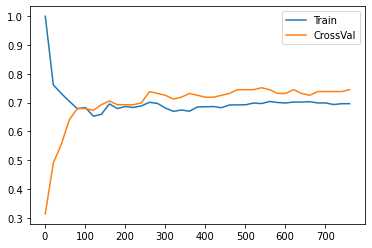

In [5]:
# Curvas de aprendizaje
def learning_curves(x, y, x_val, y_val, reg=0):
    errors_train =  []
    errors_val = []
    x_values = []
    for i in range(1, len(x), 20):
        x_values.append(i)

        log_reg_model = LogisticRegresion()
        log_reg_model.train(x[:i], y[:i])
        
        acc_train = log_reg_model.get_precision(x[:i], y[:i])
        acc_val = log_reg_model.get_precision(x_val, y_val)

        errors_train.append(acc_train)
        errors_val.append(acc_val)

    return (errors_train, errors_val, x_values)

errors_train, errors_val, interval = learning_curves(x_values, y_values, x_values_val, y_values_val)

plt.plot(interval, errors_train, label='Train')
plt.plot(interval, errors_val, label='CrossVal')
plt.legend()

Obsevamos que las curvas tienden a estabilizarse pero no llegan a hacerlo con 700 registros. Teniendo en cuenta que en total tenemos 768, es muy probable que necesitemos más datos para conseguir la máxima precisión, pero con los que tenemos ya obtenemos una muy aproximada. En conclusión, a la hora de entrenar nuestro modelo final, usaremos el dataset completo.

## 1 - Máquina de soporte de vectores

In [6]:
svm_model = SupportVectorMachine()
svm_model.train(x_values_train, y_values_train, x_values_val, y_values_val)

print("La precisión con el conjunto de validación es : {}".format(svm_model.get_precision(x_values_val, y_values_val)))
print("La precisión con el conjunto de test es: {}".format(svm_model.get_precision(x_values_test, y_values_test)))

La precisión con el conjunto de validación es : 0.7712418300653595
La precisión con el conjunto de test es: 0.6923076923076923


## 2 - Regresión Logística

In [7]:
log_reg_model = LogisticRegresion()
log_reg_model.train(x_values_train, y_values_train)

print("La precision con el conjunto de validación es: {}".format(log_reg_model.get_precision(x_values_val, y_values_val)))
print("La precision con el conjunto de test es: {}".format(log_reg_model.get_precision(x_values_test, y_values_test)))


La precision con el conjunto de validación es: 0.7581699346405228
La precision con el conjunto de test es: 0.6282051282051282


## 3 - Redes Neuronales

In [8]:
nn_model = NeuronalNetWork()
nn_model.train(x_values_train, y_values_train, x_values_val, y_values_val)

print("La precision con el conjunto de validación es: {}".format(nn_model.get_precision(x_values_val, y_values_val)))
print("La precision con el conjunto de test es: {}".format(nn_model.get_precision(x_values_test, y_values_test)))

La precision con el conjunto de validación es: 0.738562091503268
La precision con el conjunto de test es: 0.6153846153846154
